In [464]:
#!pip install plotly --upgrade
#!pip install seaborn
#!pip install nbformat
#!pip install --upgrade nbformat



In [465]:
import pandas as pd
import numpy as nb
import seaborn as sns
import plotly.express as px
import numpy as np
from IPython.display import display

In [466]:
base = pd.read_csv('german_credit_data.csv')
base.isnull().sum()




Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [467]:
base.dropna(inplace=True)

In [468]:
base.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad
10,10,25,female,2,rent,little,moderate,1295,12,car,bad
11,11,24,female,2,rent,little,little,4308,48,business,bad
12,12,22,female,2,own,little,moderate,1567,12,radio/TV,good
13,13,60,male,1,own,little,little,1199,24,car,bad
14,14,28,female,2,rent,little,little,1403,15,car,good


<Axes: xlabel='Risk', ylabel='count'>

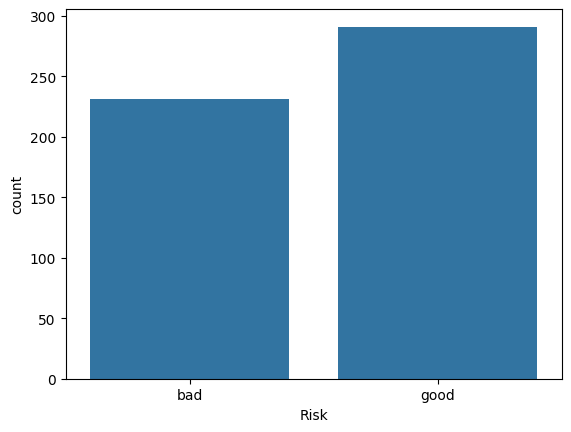

In [469]:
sns.countplot(x = base['Risk'])

In [470]:
grafico = px.scatter_matrix(base, dimensions=['Age', 'Job', 'Credit amount'], color='Risk');
display(grafico);

In [471]:
grafico = px.scatter_matrix(base, dimensions=['Credit amount'], color='Housing');
display(grafico);



In [472]:
base.tail(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [473]:
x_base = base.iloc[:, 1:10].values
y_base = base.iloc[:, 10].values
y_base = y_base.reshape(-1, 1)

In [474]:
x_base[0]

array([22, 'female', 2, 'own', 'little', 'moderate', 5951, 48, 'radio/TV'],
      dtype=object)

In [475]:
categorical_features = base[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']]

In [476]:
categorical_features

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
1,female,own,little,moderate,radio/TV,bad
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
7,male,rent,little,moderate,car,good
9,male,own,little,moderate,car,bad
...,...,...,...,...,...,...
989,male,own,little,moderate,radio/TV,good
993,male,own,little,little,furniture/equipment,good
996,male,own,little,little,car,good
998,male,free,little,little,radio/TV,bad


In [477]:
y_base

array([['bad'],
       ['good'],
       ['bad'],
       ['good'],
       ['bad'],
       ['bad'],
       ['bad'],
       ['good'],
       ['bad'],
       ['good'],
       ['bad'],
       ['bad'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['bad'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['bad'],
       ['bad'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['bad'],
       ['good'],
       ['good'],
       ['bad'],
       ['good'],
       ['bad'],
       ['good'],
       ['bad'],
       ['bad'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['bad'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['bad'],
       ['good'],
       ['bad'],
       ['good'],
       ['good'],
       ['bad'],
       ['good'],
       ['good'],
       ['good'],
       ['good'],
       ['bad'],
 

In [478]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


In [479]:

x_base[0]

array([22, 'female', 2, 'own', 'little', 'moderate', 5951, 48, 'radio/TV'],
      dtype=object)

In [480]:
encoder_saving_accounts = LabelEncoder()
encoder_checking_accounts = LabelEncoder()
x_base[0]
x_base[:,4] = encoder_saving_accounts.fit_transform(x_base[:,4])
x_base[:,5] = encoder_checking_accounts.fit_transform(x_base[:,5])
x_base[0]

array([22, 'female', 2, 'own', 0, 1, 5951, 48, 'radio/TV'], dtype=object)

In [481]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(handle_unknown='ignore'), [1,3,4,5,8])], remainder="passthrough")

In [482]:
x_base = onehotencoder.fit_transform(x_base)

In [483]:
x_base[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 22, 2, 5951, 48], dtype=object)

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  GaussianNB



In [485]:
y_base = y_base.ravel()

In [486]:
naive_credit = GaussianNB()
naive_credit.fit(x_base, y_base)

GaussianNB()

In [487]:
if y_base.ndim == 1:
    print("A matriz é 1D.")
else:
    print("A matriz não é 1D.")

A matriz é 1D.


In [488]:
if x_base.ndim == 1:
    print("A matriz é 1D.")
else:
    print("A matriz não é 1D.")

A matriz não é 1D.


In [489]:
dados_previsao = [[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 22, 2, 5951, 48]] 

# Converta a lista em uma matriz 2D usando numpy
dados_previsao_2d = np.array(dados_previsao)

# Faça a previsão com o modelo treinado
previsao = naive_credit.predict(dados_previsao_2d)
print(previsao)

['bad']


In [499]:
from sklearn.metrics import precision_score
previsoes = naive_credit.predict(x_base)
previsoes

array(['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad',
 

In [500]:
y_base

array(['bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'bad',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good',
   

In [501]:
from sklearn.metrics import accuracy_score
accuracy_score(y_base, previsoes)

0.6494252873563219

In [502]:
base

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
